# Prepare Dataset for Fine-Tuning of the HEIG-VD Model

The ground truth files can not overlap and must have valid geometry. 
The image files can not overlap, or only if they come from a mosaic. 


# Ground Truth preparation

In [30]:
import os
import difflib

import numpy as np
import geopandas as gpd
from shapely.validation import explain_validity

## 1. Clean GT

- Clean up spelling mistakes
- Merge classes

In [2]:
# Class names in Fribourg dataset
class_mapping_fr = {
    np.nan: 0,
    "batiment": 1,
    "surface_non_beton": 2,
    "surface_beton": 3,
    "roche_dure_meuble": 4,
    "eau_naturelle": 5,
    "roseliere": 6,
    "sol_neige": 7,
    "sol_vegetalise": 8,
    "sol_vigne": 9,
    "sol_agricole": 10,
    "sol_bache": 11,
    "sol_serre_temporaire": 12,
    "serre_permanente": 13,
    "toit_vegetalise": 14,
    "eau_bassin": 15,
    "gazon_synthetique": 16,
    "avant_toit": 17   
}

# Class names in Vaud dataset
class_mapping_vd = {
    np.nan: 0,
    "batiment": 1,
    "surface_non_beton": 2,
    "surface_beton": 3,
    "roche_dure_meuble": 4,
    "eau_naturelle": 5,
    "roseliere": 6,
    "neige": 7,
    "sol_vegetalise": 8,
    "sol_vigne_verger": 9,
    "sol_agricole": 10,
    "sol_bache": 11,
    "sol_serre_temporaire": 12,
    "serre_permanente": 13,
    "toiture_vegetalisee": 14,
    "eau_bassin": 15,
    "gazon_synthetique": 16,
    "avant_toit": 17   
}

### 1.a Fribourg

In [3]:
source_dir = "../data/data_train/gt/0-fr/"
target_dir = "../data/data_train/gt/1-cleaned"
field_with_class = 'CLASS_2024'
real_cats = ["batiment", "surface_non_beton", "surface_beton", "roche_dure_meuble", "eau_naturelle", "roseliere", "sol_neige",
             "sol_vegetalise", "sol_vigne", "sol_agricole", "sol_bache", "sol_serre_temporaire", "serre_permanente", "toit_vegetalise",
             "eau_bassin"]

if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"The directory {target_dir} was created.")

The directory ../data/data_train/gt/1-cleaned was created.


Get set (all_cats) of all the different class strings present

In [4]:
nancount = 0

all_cats = set()
for root, dir, files in os.walk(source_dir):
        for file in files:
            if not file.endswith((".shp",".gpkg")):
                continue
                
            gt = gpd.read_file(os.path.join(root, file))
            for row in gt.iterrows():
                cat = row[1][field_with_class]
                all_cats.add(cat)

                if not isinstance(cat, str):
                    nancount += 1
                    assert row[1]["geometry"] is None
                
                if not explain_validity(row[1]["geometry"]):
                    print(file)

                
print(f'{nancount = }')
print(f'{all_cats = }')

nancount = 0
all_cats = {'roche_dure_meuble', 'sol_vigne', 'serre_permanente', 'batiment', 'roseliere', 'sol_bache', 'sol_agricole', 'surface_non_beton', 'eau_bassin', 'sol_vegetalise', 'surface_beton', 'sol_serre_temporaire', 'toit_vegetalise', 'sol_neige', 'eau_naturelle'}


In [5]:
all_cats = [cat for cat in all_cats if isinstance(cat, str)] 
all_cats = list(all_cats)

assert len(all_cats) == len(real_cats)


Add new column with correct strings and merged classes

In [6]:
for root, dir, files in os.walk(source_dir):
        for file in files:
            if not file.endswith((".shp",".gpkg")):
                continue
            
            # print(os.path.join(root, file))
            gt = gpd.read_file(os.path.join(root, file))
            
            gt["CLASSE_SEN_ID"] = gt.apply(
                lambda x: class_mapping_fr[x[field_with_class]], axis=1)
            
            gt["geometry"] = gt.make_valid()

            gt = gt.dropna(subset = [field_with_class])
            gt = gt.explode(index_parts=False)
            gt = gt.loc[gt["geometry"].geom_type=='Polygon']
            gt.to_file(os.path.join(target_dir, file.rstrip(".gpkg.shp")+".gpkg"))

In [7]:
gt.head()

,CLASS_2024,CLASS_SEN,CLASSE_SEN_ID,geometry
0,sol_vegetalise,sol_vegetalise,8,"POLYGON ((2574472.358 1163380.856, 2574468.906..."
0,sol_vegetalise,sol_vegetalise,8,"POLYGON ((2574472.358 1163722.595, 2574472.291..."
0,sol_vegetalise,sol_vegetalise,8,"POLYGON ((2574472.358 1163821.463, 2574470.644..."
1,sol_vegetalise,sol_vegetalise,8,"POLYGON ((2574472.358 1163186.171, 2574470.553..."
2,batiment,batiment,1,"POLYGON ((2574461.983 1163548.042, 2574458.911..."


### 1.b. Vaud

In [8]:
source_dir = "../data/data_train/gt/0-vd/"
target_dir = "../data/data_train/gt/1-cleaned"
field_with_class = "classe_nom"
real_cats = ["batiment", "surface_non_beton", "surface_beton", "roche_dure_meuble", "eau_naturelle", "roseliere", "neige",
             "sol_vegetalise", "sol_vigne_verger", "sol_agricole", "sol_bache", "sol_serre_temporaire", "serre_permanente", "toiture_vegetalisee",
             "eau_bassin", "gazon_synthetique", "avant_toit"]

if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"The directory {target_dir} was created.")

Get set (all_cats) of all the different class strings present

In [9]:
nancount = 0

all_cats = set()
for root, dir, files in os.walk(source_dir):
        for file in files:
            if not file.endswith((".shp",".gpkg")):
                continue
                
            gt = gpd.read_file(os.path.join(root, file))
            for row in gt.iterrows():
                cat = row[1][field_with_class]
                all_cats.add(cat)

                if not isinstance(cat, str):
                    nancount += 1
                    assert row[1]["geometry"] is None
                
                if not explain_validity(row[1]["geometry"]):
                    print(file)

                
print(f'{nancount = }')
print(f'{all_cats = }')

nancount = 0
all_cats = {'roche_dure_meuble', 'neige', 'serre_permanente', 'batiment', 'roseliere', 'sol_bache', 'toiture_vegetalisee', 'sol_agricole', 'surface_non_beton', 'avant_toit', 'eau_bassin', 'sol_vegetalise', 'surface_beton', 'sol_serre_temporaire', 'gazon_synthetique', 'sol_vigne_verger', 'eau_naturelle'}


In [10]:
all_cats = [cat for cat in all_cats if isinstance(cat, str)] 
all_cats = list(all_cats)

assert len(all_cats) == len(real_cats)

Add new column with correct strings and merged classes

In [11]:
for root, dir, files in os.walk(source_dir):
        for file in files:
            if not file.endswith((".shp",".gpkg")):
                continue
            
            # print(os.path.join(root, file))
            gt = gpd.read_file(os.path.join(root, file))
            
            gt["CLASSE_SEN_ID"] = gt.apply(
                lambda x: class_mapping_vd[x[field_with_class]], axis=1)
            
            gt["geometry"] = gt.make_valid()

            gt = gt.dropna(subset = ["classe_nom"])
            gt = gt.explode(index_parts=False)
            gt = gt.loc[gt["geometry"].geom_type=='Polygon']
            gt.to_file(os.path.join(target_dir, file.rstrip(".shp.gpkg")+".gpkg"))

gt.head()

,classe_num,categorie,classe_nom,Auteur,Date,AOI,CLASSE_SEN_ID,geometry
0,10,sol,sol_vigne_verger,"Bureau Terranum Sàrl (Ian Bonhote, Clement Mic...",2025-03-12,9,9,"POLYGON ((2547117.000 1149007.400, 2547167.863..."
1,2,non_sol,surface_non_beton,"Bureau Terranum Sàrl (Ian Bonhote, Clement Mic...",2025-03-12,9,2,"POLYGON ((2547129.523 1148998.156, 2547130.507..."
2,10,sol,sol_vigne_verger,"Bureau Terranum Sàrl (Ian Bonhote, Clement Mic...",2025-03-12,9,9,"POLYGON ((2547117.000 1148992.744, 2547117.000..."
3,2,non_sol,surface_non_beton,"Bureau Terranum Sàrl (Ian Bonhote, Clement Mic...",2025-03-12,9,2,"POLYGON ((2547117.000 1148991.874, 2547117.000..."
4,3,non_sol,surface_beton,"Bureau Terranum Sàrl (Ian Bonhote, Clement Mic...",2025-03-12,9,3,"POLYGON ((2547141.680 1148977.512, 2547141.858..."


## 2. Rasterize

In [12]:
! python utilities/rasterize_gt.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:13:12.515 | INFO     | __main__:<module>:119 - LOG_FILE = '/proj-soils/logs/rasterize_gt.log'
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:120 - POLYGON_FOLDER = '/proj-soils/data/data_train/gt/1-cleaned'
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:121 - FIELD = 'CLASSE_SEN_ID'
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:122 - OUT_TIFF_FOLDER = '/proj-soils/data/data_train/gt/2-rasterized'
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:123 - CLASS_MAPPING = None
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:124 - MASK_PATH = None
2025-09-26 08:13:12.516 | INFO     | __main__:<module>:128 - Started Programm
2025-09-26 08:13:39.232 | INFO     | __main__:<module>:130 - Ended Program



## 3. Reclassify
Reclassify carefully depending on what future evaluation has to be done: all classes or aggregated classes ?!

In [13]:
! python utilities/reclassify.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:13:45.184 | INFO     | __main__:<module>:84 - SOURCE_FOLDER = None
2025-09-26 08:13:45.184 | INFO     | __main__:<module>:85 - TARGET_FOLDER = None
2025-09-26 08:13:45.184 | INFO     | __main__:<module>:86 - MAPPING = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 11, 13: 12, 14: 1, 15: 5, 16: 2, 17: 1}
2025-09-26 08:13:45.185 | INFO     | __main__:<module>:87 - LOG_FILE = '/proj-soils/logs/reclassify.log'
2025-09-26 08:13:45.185 | INFO     | __main__:<module>:89 - Started Programm
2025-09-26 08:13:45.185 | INFO     | __main__:<module>:91 - Ended Program



## 4. Create grid

Create a grid for the size of input tiles of the model. 

In [14]:
! python utilities/create_recursive_grid.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:13:51.348 | INFO     | __main__:<module>:161 - SOURCE_FOLDER = '/proj-soils/data/data_train/gt/1-cleaned'
2025-09-26 08:13:51.348 | INFO     | __main__:<module>:162 - TARGET_PATH = '/proj-soils/data/data_train/recursive_grids_max51-2m.gpkg'
2025-09-26 08:13:51.348 | INFO     | __main__:<module>:163 - DEPTH = 0
2025-09-26 08:13:51.349 | INFO     | __main__:<module>:164 - MAX_GRIDSIZE = 51.2
2025-09-26 08:13:51.349 | INFO     | __main__:<module>:165 - LOG_FILE = '/prj-soils/logs/create_recursive_grid.log'
2025-09-26 08:13:51.349 | INFO     | __main__:<module>:167 - Started Programm
2025-09-26 08:13:55.211 | INFO     | __main__:<module>:169 - Ended Program



## 5. Cut tiff to grid

In [15]:
! python utilities/cut_tiff_to_grid.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:14:07.383 | INFO     | __main__:<module>:249 - TIFF_FOLDER = '/proj-soils/data/data_train/gt/2-rasterized'
2025-09-26 08:14:07.384 | INFO     | __main__:<module>:250 - OUT_FOLDER = '/proj-soils/data/data_train/gt/3-cut'
2025-09-26 08:14:07.384 | INFO     | __main__:<module>:251 - GRID_PATH = '/proj-soils/data/data_train/recursive_grids_max51-2m.gpkg'
2025-09-26 08:14:07.384 | INFO     | __main__:<module>:252 - GRID_QUERY = 'depth == 0'
2025-09-26 08:14:07.384 | INFO     | __main__:<module>:253 - CELL_LENGTH = 512
2025-09-26 08:14:07.385 | INFO     | __main__:<module>:254 - ID_COLUMN = 'str_ids'
2025-09-26 08:14:07.385 | INFO     | __main__:<module>:255 - LOG_FILE = '/proj-soils/logs/cut_tiff_to_grid.log'
2025-09-26 08:14:07.385 | INFO     | __main__:<module>:256 - MASK_PATH = None
2025-09-26 08:14:07.385 | INFO     | __main__:<module>:257 - FILE_EXT = '.tif'
2025-09-26 08:14:07.385 | INFO     | __main__:<module>:264 - Started Programm
len(grid) = 64
2025-09-26 08:14:07.45

# Prepare scratch and swissimage
Download the SWISSIMAGE 10 cm tiles from the internet using wget and list of download hyperlinks. See the README in the folder data_train/im/0-ori-res/.


## 1. Ensure every file has resolution 10cm


In [22]:
! python utilities/rescale_tif.py --config_file ../config/train/config-train_fr_vd_im.yaml

2025-09-26 08:18:20.985 | INFO     | __main__:<module>:128 - TIFF_FOLDER = '/proj-soils/data/data_train/im/0-ori-res'
2025-09-26 08:18:20.986 | INFO     | __main__:<module>:129 - OUT_FOLDER = '/proj-soils/data/data_train/im/1-10cm'
2025-09-26 08:18:20.986 | INFO     | __main__:<module>:130 - TARGET_RES = 0.1
2025-09-26 08:18:20.986 | INFO     | __main__:<module>:131 - LOG_FILE = '/proj-soils/logs/rescale.log'
2025-09-26 08:18:20.986 | INFO     | __main__:<module>:135 - Started Programm
2025-09-26 08:18:21.005 | INFO     | __main__:rescale_tif:50 - swissimage-dop10_2023_2569-1201_0.1_2056.tif is already at target resolution
2025-09-26 08:18:21.046 | INFO     | __main__:rescale_tif:50 - swissimage-dop10_2023_2535-1151_0.1_2056.tif is already at target resolution
2025-09-26 08:18:21.063 | INFO     | __main__:rescale_tif:50 - swissimage-dop10_2020_2561-1195_0.1_2056.tif is already at target resolution
2025-09-26 08:18:21.111 | INFO     | __main__:rescale_tif:50 - swissimage-dop10_2020_2561

In [23]:
! python utilities/build_vrt.py --config_file ../config/train/config-train_fr_vd_im.yaml

2025-09-26 08:18:27.775 | INFO     | __main__:<module>:78 - ---------------------
2025-09-26 08:18:27.775 | INFO     | __main__:<module>:79 - SOURCE_FOLDER = '/proj-soils/data/data_train/im/1-10cm'
2025-09-26 08:18:27.775 | INFO     | __main__:<module>:80 - TARGET_FOLDER = '/proj-soils/data/data_train/im/1-10cm'
2025-09-26 08:18:27.775 | INFO     | __main__:<module>:81 - VRT_NAME = 'mosaic.vrt'
2025-09-26 08:18:27.775 | INFO     | __main__:<module>:82 - BBOX_GPKG = None
2025-09-26 08:18:27.775 | INFO     | __main__:<module>:86 - Started Programm
2025-09-26 08:18:27.776 | INFO     | __main__:vrt_build:33 - Listing the image files...
2025-09-26 08:18:27.861 | INFO     | __main__:<module>:88 - Ended Program  0.08524298667907715 s.



## Cut tiff to grid

In [24]:
! python utilities/cut_tiff_to_grid.py --config_file ../config/train/config-train_fr_vd_im.yaml

2025-09-26 08:18:35.486 | INFO     | __main__:<module>:249 - TIFF_FOLDER = '/proj-soils/data/data_train/im/1-10cm'
2025-09-26 08:18:35.486 | INFO     | __main__:<module>:250 - OUT_FOLDER = '/proj-soils/data/data_train/im/2-cut'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:251 - GRID_PATH = '/proj-soils/data/data_train/recursive_grids_max51-2m.gpkg'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:252 - GRID_QUERY = 'depth == 0'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:253 - CELL_LENGTH = 512
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:254 - ID_COLUMN = 'str_ids'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:255 - LOG_FILE = '/proj-soils/logs/cut_tiff_to_grid.log'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:256 - MASK_PATH = None
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:257 - FILE_EXT = '.vrt'
2025-09-26 08:18:35.487 | INFO     | __main__:<module>:264 - Started Programm
len(grid) = 8404
2025-09-26 08:18:36.875 | 

# Split dataset

Split the ground truth in train, validation and test dataset. It can also be done only on some part of the ground truth with help of vector layer for cantonal border by example. 
The split is saved in YAML file: each tile is attributed to one dataset key (train, val or test). 

In [25]:
! python utilities/random_split_grid_by_region.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:22:27.712 | INFO     | __main__:<module>:127 - SEED = 42
2025-09-26 08:22:27.713 | INFO     | __main__:<module>:128 - GRID_PATH = '/proj-soils/data/data_train/recursive_grids_max51-2m.gpkg'
2025-09-26 08:22:27.713 | INFO     | __main__:<module>:129 - CT_AOI = '/proj-soils/data/data_train/canton_perimeter.gpkg'
2025-09-26 08:22:27.713 | INFO     | __main__:<module>:130 - GRID_PATH_SPLIT = '/proj-soils/data/data_train/recursive_grids_max51-2m_splits.gpkg'
2025-09-26 08:22:27.713 | INFO     | __main__:<module>:131 - PREVIOUS_SPLIT = '/proj-soils/data/data_train/model_exploration_recursive_grids_max204-8m.gpkg'
2025-09-26 08:22:27.713 | INFO     | __main__:<module>:132 - TARGET_ROOT = '/proj-soils/data/data_train/'
2025-09-26 08:22:27.714 | INFO     | __main__:<module>:133 - AOI_FILTER = {' ': 'FR+VD', 'Vaud': 'FR', 'Fribourg': 'VD'}
2025-09-26 08:22:27.714 | INFO     | __main__:<module>:139 - Started Programm
2025-09-26 08:22:32.147 | INFO     | __main__:<module>:141 - Ended

Some edits on the split may be needed to have a balanced distribution throughout the classes.
Aterwards, one must updates the YAML with the split.

In [26]:
import yaml

grid_p2_split_p1 = gpd.read_file("/proj-soils/data/data_train/recursive_grids_max51-2m_splits_edited_del.gpkg")

AOI_FILTER = {' ': 'FR+VD', 'Vaud': 'FR', 'Fribourg': 'VD'}
for key, value in AOI_FILTER.items(): 
    grid_to_yaml = grid_p2_split_p1[grid_p2_split_p1['name']!=key]
    split_dic = {"train": sorted(list(grid_to_yaml[grid_to_yaml['final_split']=='train']['unique_id'])), 
                "val": sorted(list(grid_to_yaml[grid_to_yaml['final_split']=='val']['unique_id'])), 
                "test":sorted(list(grid_to_yaml[grid_to_yaml['final_split']=='test']['unique_id']))}
    with open(f'/proj-soils/data/data_train/split_{value}.yaml', 'w') as file:
        yaml.dump(split_dic, file)



Do the actual split of tiles in folders with help of the YAML file containing split information.

In [27]:
! python utilities/random_split.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:24:15.691 | INFO     | __main__:<module>:159 - SOURCE_IPT_FOLDER = '/proj-soils/data/data_train/im/2-cut'
2025-09-26 08:24:15.693 | INFO     | __main__:<module>:160 - SOURCE_TGT_FOLDER = '/proj-soils/data/data_train/gt/3-cut/'
2025-09-26 08:24:15.693 | INFO     | __main__:<module>:161 - TARGET_ROOT = '/proj-soils/data/data_train/dataset/FR+VD/'
2025-09-26 08:24:15.693 | INFO     | __main__:<module>:162 - SEED = 6
2025-09-26 08:24:15.693 | INFO     | __main__:<module>:163 - SPLIT_FILE = '/proj-soils/data/data_train/split_FR+VD.yaml'
2025-09-26 08:24:15.693 | INFO     | __main__:<module>:164 - LOG_FILE = '/proj-soils/logs/random_split.log'
2025-09-26 08:24:15.694 | INFO     | __main__:<module>:168 - Started Programm
2025-09-26 08:24:16.183 | INFO     | __main__:random_split:93 - Loaded split from /proj-soils/data/data_train/split_FR+VD.yaml
2025-09-26 08:24:56.860 | INFO     | __main__:random_split:124 - traincount = 6212
2025-09-26 08:24:56.862 | INFO     | __main__:random

Verify distribution of classes in the datasets. 

In [28]:
! python utilities/pixel_count_per_class.py --config_file ../config/train/config-train_fr_vd_gt.yaml

2025-09-26 08:27:09.770 | INFO     | __main__:<module>:109 - DATASET_DIR = '/proj-soils/data/data_train/dataset/FR+VD/'
2025-09-26 08:27:09.771 | INFO     | __main__:<module>:110 - SUB_DIRS = ['train', 'val', 'test']
2025-09-26 08:27:09.772 | INFO     | __main__:<module>:111 - count_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0}
2025-09-26 08:27:09.772 | INFO     | __main__:<module>:112 - CLASS_NAME = ['no_data', 'building', 'non_beton', 'beton', 'roche dur meuble', 'water', 'roseliere', 'neige', 'sol vegetalise', 'sol agricole', 'vigne', 'bache', 'serre temporaire', 'serre permanente', 'toit vegetalise', 'eau bassin', 'gazon synthetique', 'avant-toit', 'dataset']
2025-09-26 08:27:09.772 | INFO     | __main__:<module>:118 - Started Programm
2025-09-26 08:27:49.960 | INFO     | __main__:<module>:120 - Ended Program 40.18799114227295 s



{'train': [0.0, 2.28, 2.32, 3.53, 4.54, 13.64, 2.08, 0.57, 31.36, 0.89, 36.65, 0.76, 0.08, 1.06, 0.13, 0.04, 0.04, 0.03], 'val': [0.0, 1.16, 2.48, 2.48, 5.15, 16.78, 3.27, 0.42, 27.74, 0.86, 36.68, 0.45, 0.26, 2.0, 0.15, 0.04, 0.04, 0.01], 'test': [0.0, 1.18, 2.09, 3.15, 4.36, 17.33, 2.71, 0.73, 27.58, 0.61, 38.52, 0.67, 0.11, 0.67, 0.18, 0.06, 0.0, 0.05], 'gt': [0.0, 1.99, 2.31, 3.34, 4.6, 14.53, 2.31, 0.57, 30.4, 0.85, 36.9, 0.71, 0.11, 1.13, 0.14, 0.04, 0.03, 0.03]}


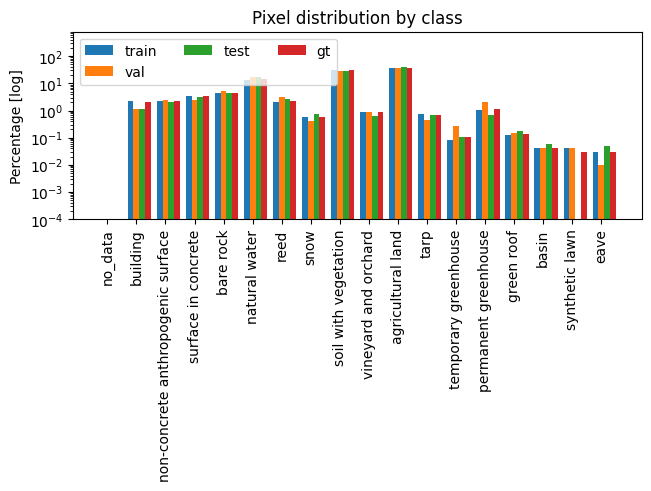

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/proj-soils/data/data_train/dataset/FR+VD/pixel_counts.csv")

# Identify key column and value columns
key_column = df.columns[-1]
value_columns = df.columns[:-1]

# Build the dictionary
result_dict = {
    row[key_column]: row[value_columns].tolist()
    for _, row in df.iterrows()
}
print(result_dict)

classes = ['no_data','building','non-concrete anthropogenic surface','surface in concrete', 'bare rock','natural water','reed','snow', 
                'soil with vegetation', 'vineyard and orchard', 'agricultural land', 'tarp', 'temporary greenhouse',
                'permanent greenhouse', 'green roof', 'basin', 'synthetic lawn', 'eave']
x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in result_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage [log]')
ax.set_title('Pixel distribution by class')
ax.set_xticks(x + width, classes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left', ncols=3)

plt.yscale('log')
ax.set_ylim(0.0001, 800)

plt.savefig("/proj-soils/data/data_train/dataset/FR+VD/distribution.png")
plt.show()

